

---


  #         **Advance Statistical Tools for Data Science - IT590**
  #         **Assignment - 1**
  #          **Siddhant Kotak - 202201410**


---



In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## Problem - 1
Many factors affect the price of a commodity. These factors fall into two broad
categories: fixed costs and variable costs. As an example, let’s consider the price charged by a jewelry merchant for a diamond. The variable cost of a diamond depends on its size. A variable cost is the product of the quantity being sold times the cost per unit of quantity. For a diamond, the variable cost is the product of its weight (in carats) times the cost in dollars per carat. (A carat is a unit of weight; one carat is 0.2 gram.) Fixed costs are present regardless of the size of the diamond. Fixed costs include overhead expenses, such as the cost of maintaining the store where diamonds are shown or hosting a Web site to advertise the gems online. The ratio of the cost of a diamond to its weight mixes fixed and variable costs. A one-carat diamond might cost, say, $2,500. That’s not the variable cost unless this jeweler has no fixed costs. Fixed and variable costs can be separated by comparing the prices of diamonds of varying sizes. The relationship between the price and weight in a collection of diamonds of varying weights allows us to separate these costs and come to a better understanding of what determines the final cost of a gem.

(i) Draw the scatter plot. What kind of model would be appropriate?
(ii) Find the ordinary least squares estimates and interpret it.
(iii) Find the 95% confidence intervals of the intercept and slope.
(iv) Interpret thevalue of R squared and root mean squared error.
(v) Check the
assumptions of the model using regression diagnostics.

In [174]:
df = pd.read_excel('/content/drive/MyDrive/Classroom/IT590/emerald_diamonds.xlsx')
df.head()

,Price ($),Weight (carats)
0,853,0.47
1,1041,0.48
2,1120,0.48
3,923,0.45
4,923,0.45



We can model it using a Regression Model.
- $y = f(x) + \epsilon$
- $f(x) = Mean(y|x)$
- $\epsilon$ is random error (irreducible error)

If we use Linear Regression Model, $f(x) = β_0+β_1*x$.

The standard Model Assumptions are as follows:
- $Mean(ϵ) = 0$
- $Var(ϵ) = σ^2$ (constant)
- $ϵ$ is uncorrelated with x

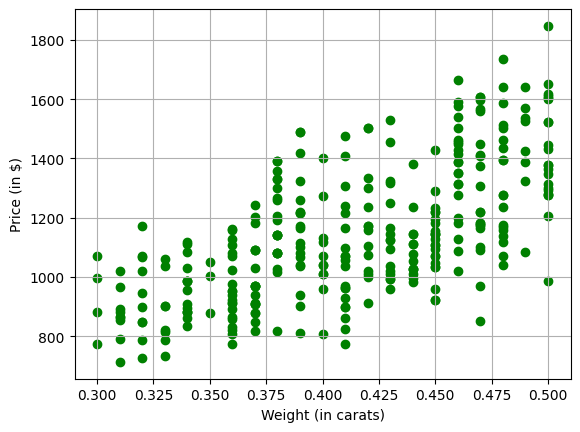

In [175]:
plt.scatter(df['Weight (carats)'],df['Price ($)'],color='green')
plt.xlabel('Weight (in carats)')
plt.ylabel('Price (in $)')
plt.grid()
plt.show()


Upon applying Ordinary Least Square Regression, the equation is given as $ y_{i} = b_0 + b_1 * x_i + e_i$ where $ sum(e_i^2)$ is minimum.

where:
- $x_i$ = Weight of $i^{th}$ sample of Diamond (in Carats)
- $y_i$ = Price of $i^{th}$ sample of Diamond (in Dollars)
- $e_i$ = Error
- $b_0$ = Fixed Cost
- $b_1$ = Marginal Cost (Cost of 1 carat of Product)

In [176]:
def ols_estimate(x, y):
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    X = np.concatenate([np.ones_like(x), x], axis=1)
    b = np.linalg.solve(X.T @ X, X.T @ y)
    b0, b1 = b.flatten()
    return b0, b1

def confidence_interval_of_estimate(x, y, confidence_val):
    b0, b1 = ols_estimate(x, y)
    n = len(x)
    err = y.values - (b0 + b1 * x.values)
    varsig = np.sum(err**2) / (n - 2)
    std_err_b1 = np.sqrt(varsig / np.sum((x.values - np.mean(x.values))**2))
    std_err_b0 = np.sqrt((varsig / n) + (varsig * np.sum(x.values)**2) / (n * n * np.sum((x.values - np.mean(x.values))**2)))
    t_val = stats.t.ppf(1 - ((1 - confidence_val) / 2), n - 2)
    lower_b0 = b0 - t_val * std_err_b0
    upper_b0 = b0 + t_val * std_err_b0
    lower_b1 = b1 - t_val * std_err_b1
    upper_b1 = b1 + t_val * std_err_b1
    return lower_b0, upper_b0, lower_b1, upper_b1

def R_val(x, y):
    b0, b1 = ols_estimate(x, y)
    y_pred = b0 + b1 * x.values
    SS_tot = np.sum((y.values - np.mean(y.values))**2)
    SS_res = np.sum((y.values - y_pred)**2)
    R_sq = 1 - (SS_res / SS_tot)
    return R_sq

def RMSE(x, y):
    b0, b1 = ols_estimate(x, y)
    y_pred = b0 + b1 * x.values
    SS_res = np.sum((y.values - y_pred)**2)
    RMSE = np.sqrt(SS_res / (len(x) - 2))
    return RMSE

def plot_residual_vs_x(x,y):
    b0,b1 = ols_estimate(x,y)
    y_pred = b0 + b1*x
    err = y - y_pred
    # Take mean of errors grouping based on values of x
    #print(x.dtype)
    df = pd.DataFrame(x.values,columns = ['x'])
    df['err'] = err
    #display(df.head())
    df = df.groupby('x').mean().reset_index()
    #display(df.head())
    new_x = df['x']
    new_err = df['err']
    plt.figure(figsize=(10,8))
    plt.scatter(x,err,label = 'Residuals', color='black')
    plt.plot(new_x,new_err,label = 'Mean of Residuals',color='red')
    plt.plot(x,[0]*len(x),label = 'Base Line',color='purple')
    plt.xlabel('x')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid()
    plt.show()

def qq_plot(x,y):
    b0,b1 = ols_estimate(x,y)
    y_pred = b0 + b1*x
    err = y - y_pred
    residual = (err - np.mean(err)) / np.std(err, ddof=1)
    sorted_res = np.sort(residual)
    theoretical_quantiles = stats.probplot(residual, dist="norm")[0][0]
    plt.scatter(theoretical_quantiles,sorted_res,label='Observed',color='black')
    plt.plot(sorted_res,sorted_res,label='Theoretical',color='red')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Observed Quantiles')
    plt.legend()
    plt.grid()
    plt.show()

def error_distribution_plot(x,y):
    b0,b1 = ols_estimate(x,y)
    y_pred = b0 + b1*x
    err = y - y_pred
    plt.figure(figsize=(10,8))
    plt.hist(err,bins = 30,color='green')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()
def plot_regression_line(x,y):
    b0,b1 = ols_estimate(x,y)
    y_pred = b0 + b1*x
    plt.figure(figsize=(10,8))
    plt.scatter(x,y, label = 'Data',color='black')
    plt.plot(x,y_pred,color = 'red', label = 'Regression Estimate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()


In [177]:
b0,b1 = ols_estimate(df['Weight (carats)'],df['Price ($)'])
print('b0 (Fixed Cost) = ',b0)
print('b1 (Variable Cost) = ',b1)

b0 (Fixed Cost) =  43.48910163187338
b1 (Variable Cost) =  2669.74580260002


In [178]:
confidence_level = 0.95
intercept_low,intercept_high,slope_low,slope_high = confidence_interval_of_estimate(df['Weight (carats)'],df['Price ($)'],confidence_level)
print(int(confidence_level*100),'% confidence interval of intercept = (',intercept_low,',',intercept_high,')')
print(int(confidence_level*100),'% confidence interval of slope = (',slope_low,',',slope_high,')')

95 % confidence interval of intercept = ( -97.97374580665578 , 184.95194907040255 )
95 % confidence interval of slope = ( 2330.4131055891958 , 3009.078499610844 )


In [179]:
R_sq = R_val(df['Weight (carats)'],df['Price ($)'])
print('R Squared = ',R_sq)
RMSE_val = RMSE(df['Weight (carats)'],df['Price ($)'])
print('Root Mean Squared Error = ',RMSE_val)

R Squared =  0.42970427331812
Root Mean Squared Error =  170.2149256049248


- $R^2 = 0.42$ means 42% of errors are explained by our linear regression model which is decent.
- $RMSE = 170$ $ which means our model is performing well.

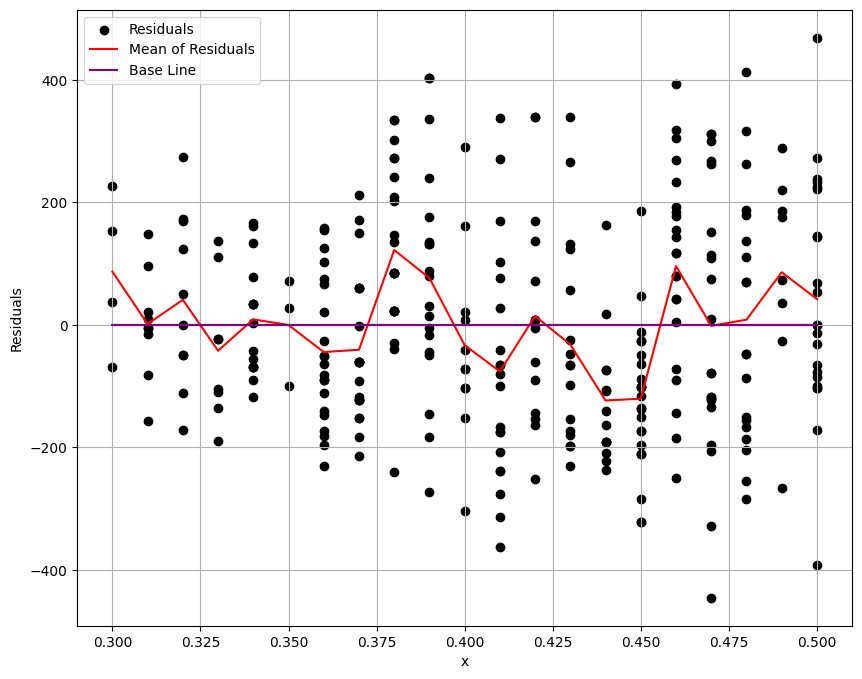

In [180]:
plot_residual_vs_x(df['Weight (carats)'],df['Price ($)'])

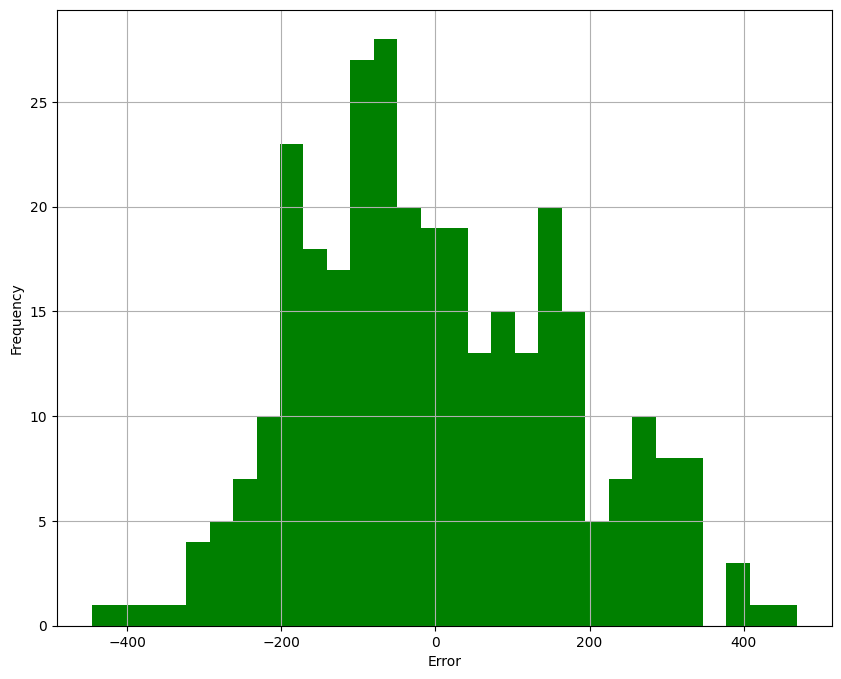

In [181]:
error_distribution_plot(df['Weight (carats)'],df['Price ($)'])

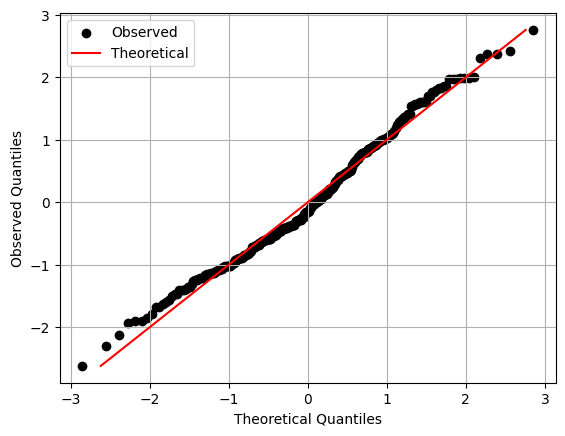

In [182]:
qq_plot(df['Weight (carats)'],df['Price ($)'])

## Problem - 2

Utility companies in many older communities still rely on “meter readers” who
visit homes to read meters that measure consumption of electricity and gas. Unless someone is home to let the meter reader inside; the utility company estimates the
amounts used. The utility company in this example sells natural gas to homes in
the Philadelphia area. Many of these are older homes that have the gas meter in the basement. We can estimate the use of gas with a regression equation

The explanatory variable is the average number of degrees below 65  during the
billing period, and the response is the number of hundred cubic feet of natural
gas (CCF) consumed during the billing period (about a month). The explanatory
variable is 0 if the average temperature is above 65 Fahrenheit (assuming a
homeowner won’t need heating in this case). The intercept estimates the amount
of gas consumed for activity unrelated to temperature (such as cooking). The
slope estimates the average amount of gas used per 1 decrease in temperature.
For this experiment, the local utility has 4 years of data (n = 48) months for an owner-occupied, detached home.

In [183]:
df = pd.read_excel('/content/drive/MyDrive/Classroom/IT590/gas_consumption.xlsx')
df.head()

,Month,Year,Gas (CCF),Average Temp,Degrees Below 65
0,Jan,2007,157,43,22
1,Feb,2007,207,27,38
2,Mar,2007,203,37,28
3,Apr,2007,122,46,19
4,May,2007,46,61,4


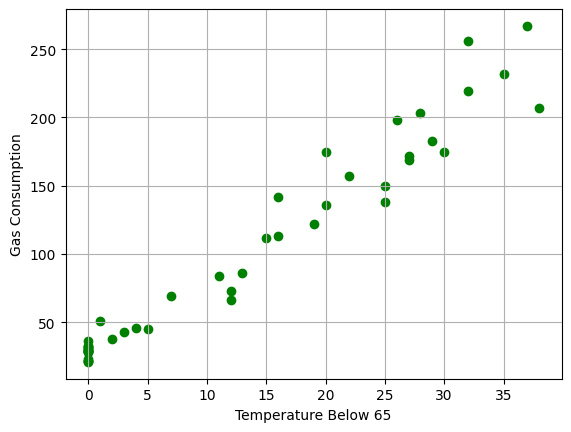

In [184]:
gas = df['Gas (CCF)']
temp_below_65 = df['Degrees Below 65']
plt.scatter(temp_below_65,gas,color = 'green')
plt.xlabel('Temperature Below 65')
plt.ylabel('Gas Consumption')
plt.grid()
plt.show()

Upon applying Ordinary Least Square Regression, the equation is given as $ y_{i} = b_0 + b_1 * x_i + e_i$ where $ sum(e_i^2)$ is minimum.

where:
- $x_i$ = Temperature (in Fahrenheit)
- $y_i$ = Gas Consumption (in CCF)
- $e_i$ = Error term   
- $b_0$ = Fixed consumption
- $b_1$ = Marginal consumption


In [185]:
b0,b1 = ols_estimate(temp_below_65,gas)
print('b0 (Fixed Usage of Gas) = ',b0)
print('b1 (Increase in consumption for 1 degree decrease in temperature below 65) = ',b1)

b0 (Fixed Usage of Gas) =  26.72735035686634
b1 (Increase in consumption for 1 degree decrease in temperature below 65) =  5.692847509117851


In [186]:
confidence_level = 0.95
intercept_low,intercept_high,slope_low,slope_high = confidence_interval_of_estimate(temp_below_65,gas,confidence_level)
print(int(confidence_level*100),'% confidence interval of intercept = (',intercept_low,',',intercept_high,')')
print(int(confidence_level*100),'% confidence interval of slope = (',slope_low,',',slope_high,')')

95 % confidence interval of intercept = ( 20.246023312662565 , 33.20867740107011 )
95 % confidence interval of slope = ( 5.326927221765225 , 6.058767796470478 )


In [187]:
R_sq = R_val(temp_below_65,gas)
print('R Squared = ',R_sq)
RMSE_val = RMSE(temp_below_65,gas)
print('Root Mean Squared Error = ',RMSE_val)

R Squared =  0.9551955158867566
Root Mean Squared Error =  16.087447272215275


- $R^2 = 0.95$ means 95% of errors are explained by the linear regression model which is quite good!
- $RMSE = 16$ CCF.

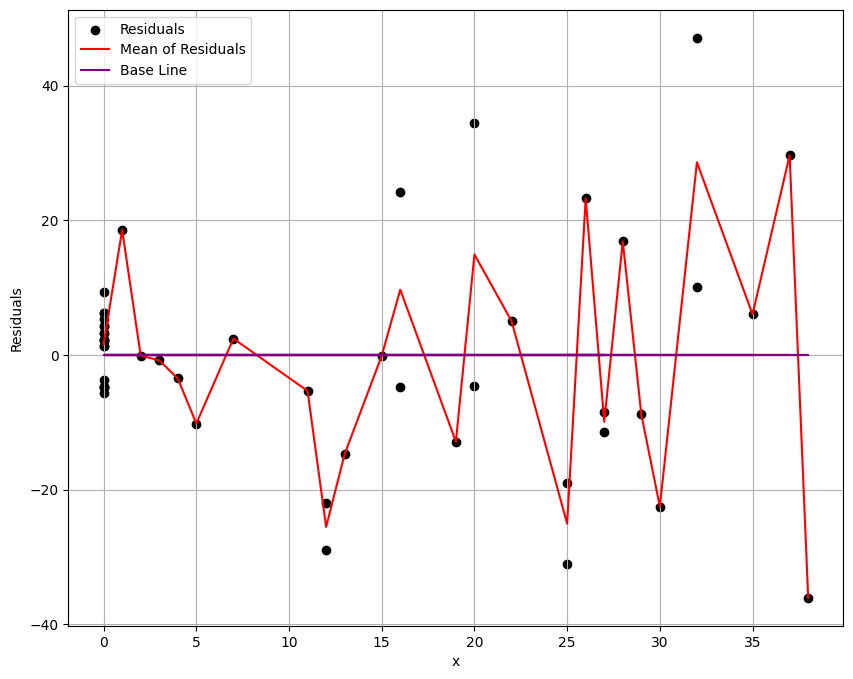

In [188]:
plot_residual_vs_x(temp_below_65,gas)

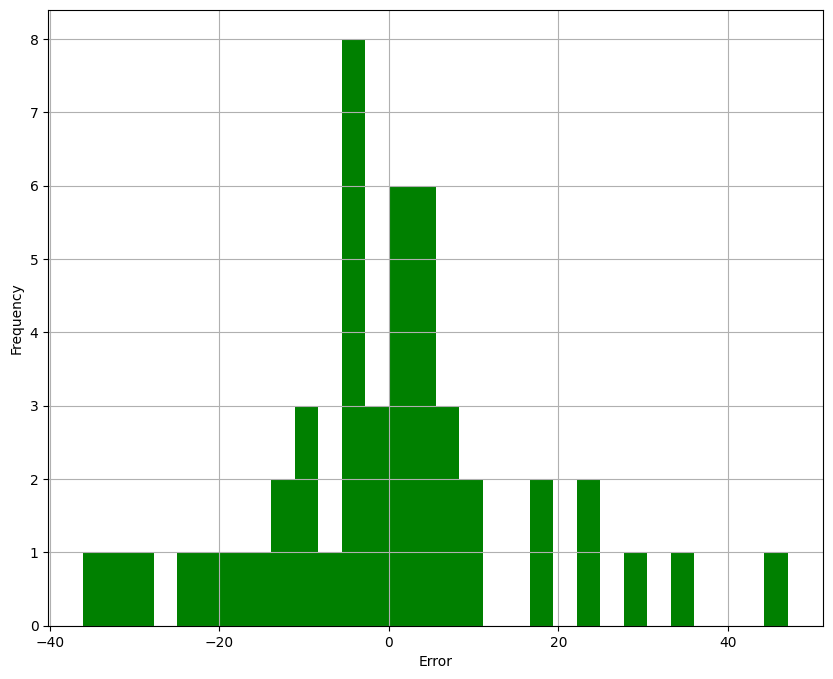

In [189]:
error_distribution_plot(temp_below_65,gas)

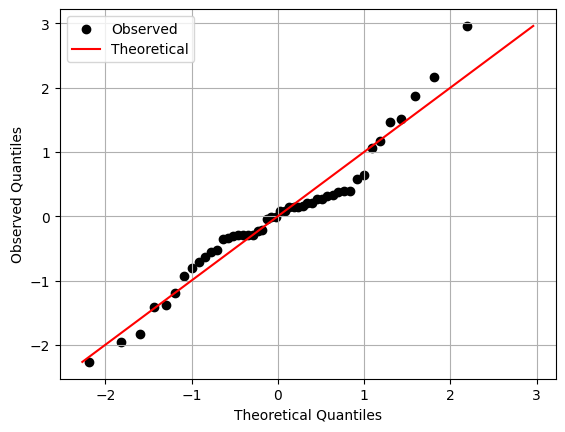

In [190]:
qq_plot(temp_below_65,gas)

## Problem - 3

THE PRICE OF GASOLINE CAN BE A PAINFUL REMINDER OF THE LAWS
OF SUPPLY AND DEMAND.

---

The first big increase struck in 1973 when the Organization of Petroleum
Exporting Countries (OPEC) introduced production quotas. Gas prices had varied
so little that accurate records had not been kept. The data shown in Figure 1 begin
in 1975, in time to capture a second jump in 1979. After selling for 60 to 70 cents
per gallon during the 1970s, the average price rose above $1.40 per gallon in 1981.
That jump seems small, though, compared to recent increases. In response to rising
prices, Congress passed the Energy Policy and Conservation Act of 1975. This Act
established the corporate average fuel economy (CAFE) standards. The CAFE
standards set mileage requirements for the cars sold in the United States. The
current standard for cars is 30.2 miles per gallon and is slated to increase to 37.8
miles per gallon for 2016 models and to more than 50 miles per gallon by 2025.
One way to improve mileage is to reduce the weight of the car. Lighter materials
such as carbon fiber and aluminum, however, cost more than the steel they replace.
Before investing in exotic materials, manufacturers want evidence of the benefit.
What sort of improvements in mileage should a manufacturer expect from reducing
the weight of a car by, say, 200 pounds?
The dependent variable is MPG (miles per gallon) and the independent variable is
the weight of the car.

In [191]:
df = pd.read_excel('/content/drive/MyDrive/Classroom/IT590/cars.xlsx')
df.head()

,MPG City,Weight (000 lbs),Gallons / (100 miles),Weight,Model
0,27,2.694,3.703704,2694.0,2003 Acura RSX 5-speed MT Current
1,20,3.470,5.000000,3470.0,2003 Acura 3.2 CL 5-spd AT Current
2,18,3.898,5.555556,3898.0,2003 Acura 3.5 RL Sedan Current
3,17,3.153,5.882353,3153.0,2003 Acura NSX 3.2 6-Speed MT Current
4,17,4.420,5.882353,4420.0,2003 Acura MDX Sport Utility Current


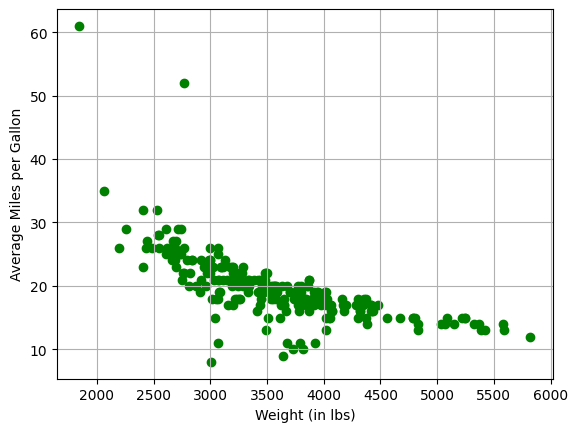

In [192]:
gallons_100 = df['Gallons / (100 miles)']
mpg = df['MPG City']
weight = df['Weight']
plt.scatter(weight,mpg,color='green')
plt.xlabel('Weight (in lbs)')
plt.ylabel('Average Miles per Gallon')
plt.grid()
plt.show()

Upon applying Ordinary Least Square Regression, the equation is given as $ y_{i} = b_0 + b_1 * x_i + e_i$ where $ sum(e_i^2)$ is minimum.

where:  
- $x_i$ = Weight (in lbs) of the $i^{th}$ car  
- $y_i$ = Mileage (in miles per gallon) of the i$^{th}$ car
- $e_i$ = Error term    
- $b_0$ = Minimum Mileage
- $b_1$ = Increase in mileage for 1 lbs weight increase   


In [193]:
b0,b1 = ols_estimate(weight,mpg)
print('b0 (Minimum Mileage of Car) = ',b0)
print('b1 (Increase in Mileage for 1 lbs weight increase) = ',b1)

b0 (Minimum Mileage of Car) =  38.19643204535745
b1 (Increase in Mileage for 1 lbs weight increase) =  -0.005179173542687277


In [194]:
confidence_level = 0.95
intercept_low,intercept_high,slope_low,slope_high = confidence_interval_of_estimate(weight,mpg,confidence_level)
print(int(confidence_level*100),'% confidence interval of intercept = (',intercept_low,',',intercept_high,')')
print(int(confidence_level*100),'% confidence interval of slope = (',slope_low,',',slope_high,')')

95 % confidence interval of intercept = ( 35.58361379985685 , 40.809250290858046 )
95 % confidence interval of slope = ( -0.005898091547977684 , -0.004460255537396869 )


In [195]:
R_sq = R_val(weight,mpg)
print('R Squared = ',R_sq)
RMSE_val = RMSE(weight,mpg)
print('Root Mean Squared Error = ',RMSE_val)

R Squared =  0.4669561091212068
Root Mean Squared Error =  4.04300591185899


- $R^2 = 0.46$ means 46% of errors are explained by the linear regression model which is decent.
- $RMSE = 4.04$ mpg (miles per gallon).

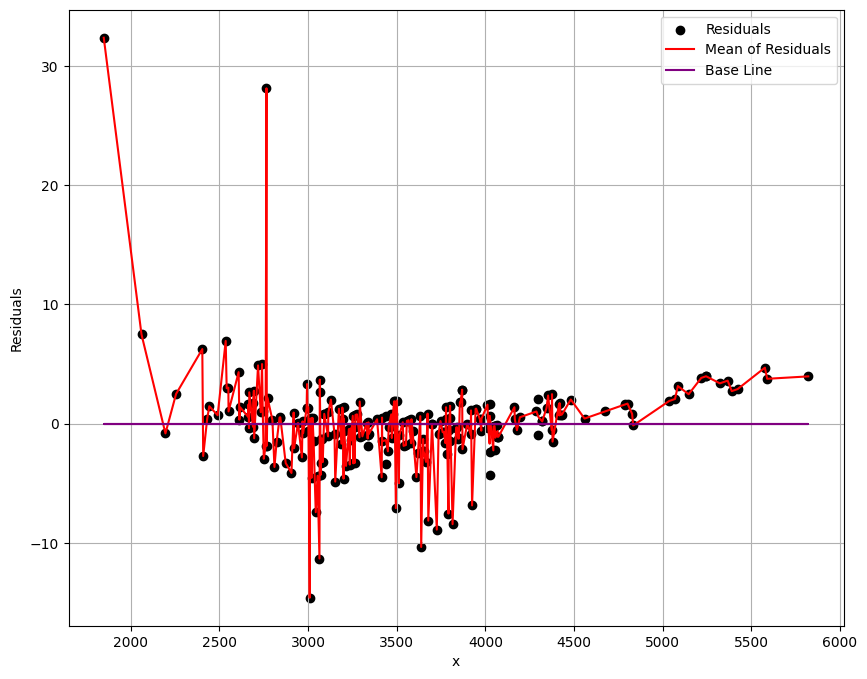

In [196]:
plot_residual_vs_x(weight,mpg)

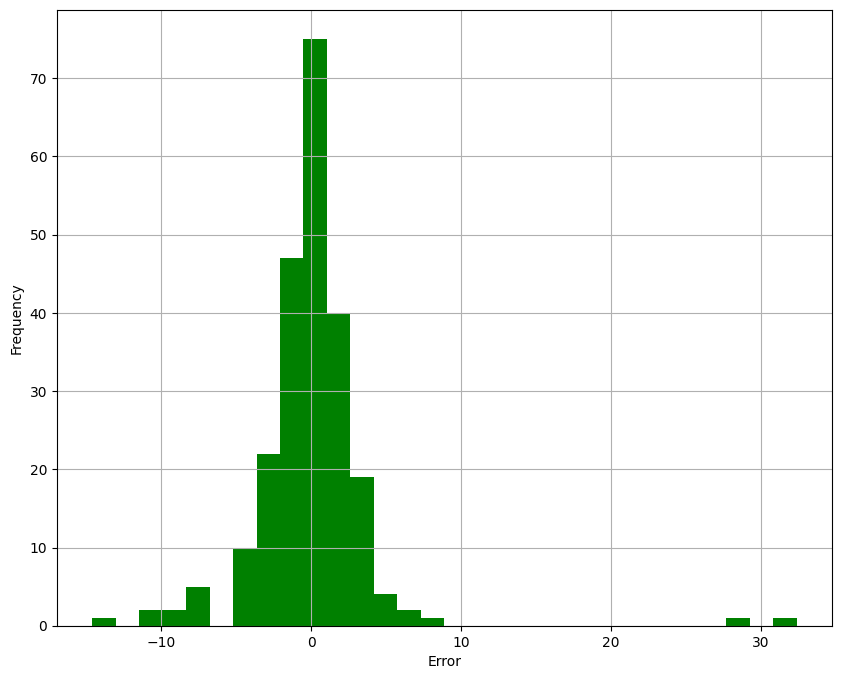

In [197]:
error_distribution_plot(weight,mpg)

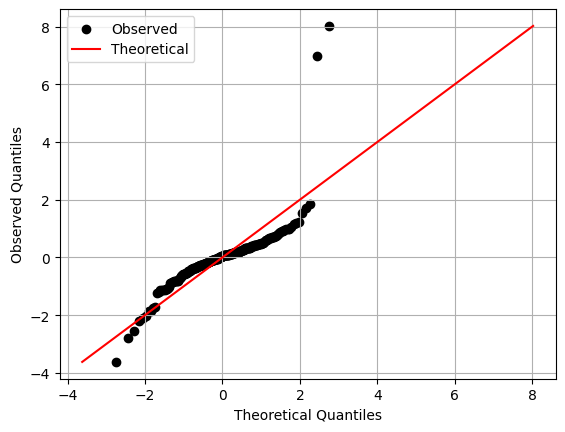

In [198]:
qq_plot(weight,mpg)

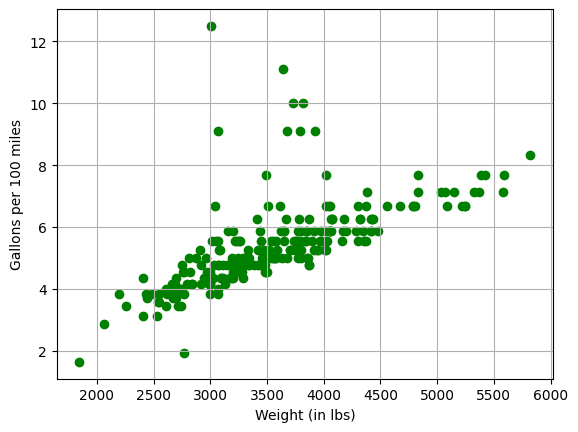

In [199]:
plt.scatter(weight,gallons_100,color='green')
plt.xlabel('Weight (in lbs)')
plt.ylabel('Gallons per 100 miles')
plt.grid()
plt.show()

Upon applying Ordinary Least Square Regression, the equation is given as $ y_{i} = b_0 + b_1 * x_i + e_i$ where $ sum(e_i^2)$ is minimum.

where:  
- $x_i$ = Weight (in lbs) of the $i^{th}$ car
- $y_i$ = Gallons per 100 miles of the i$^{th}$ car
- $e_i$ = Error term    
- $b_0$ = Minimum Gallons of petrol required for 100 miles
- $b_1$ = Increase in gallons of petrol for 1 lbs weight increase     


In [200]:
b0,b1 = ols_estimate(weight,gallons_100)
print('b0 (Minimum gallons of petrol required for 100 miles) = ',b0)
print('b1 (Increase in gallons pf petrol for 1 lbs weight increase) = ',b1)

b0 (Minimum gallons of petrol required for 100 miles) =  0.9521541474705404
b1 (Increase in gallons pf petrol for 1 lbs weight increase) =  0.001247352265805485


In [201]:
confidence_level = 0.95
intercept_low,intercept_high,slope_low,slope_high = confidence_interval_of_estimate(weight,gallons_100,confidence_level)
print(int(confidence_level*100),'% confidence interval of intercept = (',intercept_low,',',intercept_high,')')
print(int(confidence_level*100),'% confidence interval of slope = (',slope_low,',',slope_high,')')

95 % confidence interval of intercept = ( 0.2695611081075786 , 1.6347471868335022 )
95 % confidence interval of slope = ( 0.001059536512785161 , 0.001435168018825809 )


In [202]:
R_sq = R_val(weight,gallons_100)
print('R Squared = ',R_sq)
RMSE_val = RMSE(weight,gallons_100)
print('Root Mean Squared Error = ',RMSE_val)

R Squared =  0.42677006906135195
Root Mean Squared Error =  1.0562264322406034


- $R^2 = 0.42$ means 42% of errors are explained by the linear regression model which is decent.
- $RMSE = 1.05$ gallons per 100 miles.

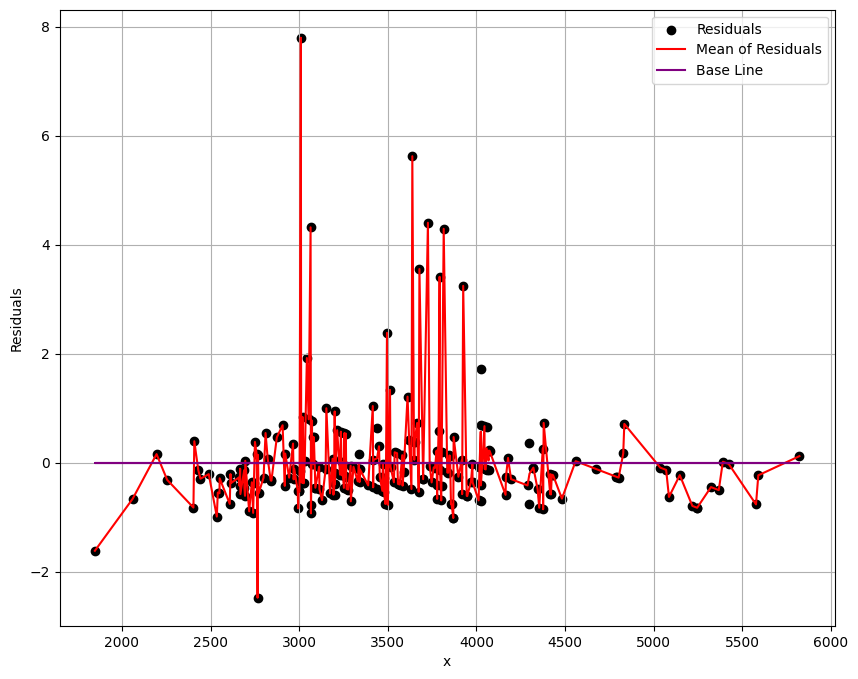

In [203]:
plot_residual_vs_x(weight,gallons_100)

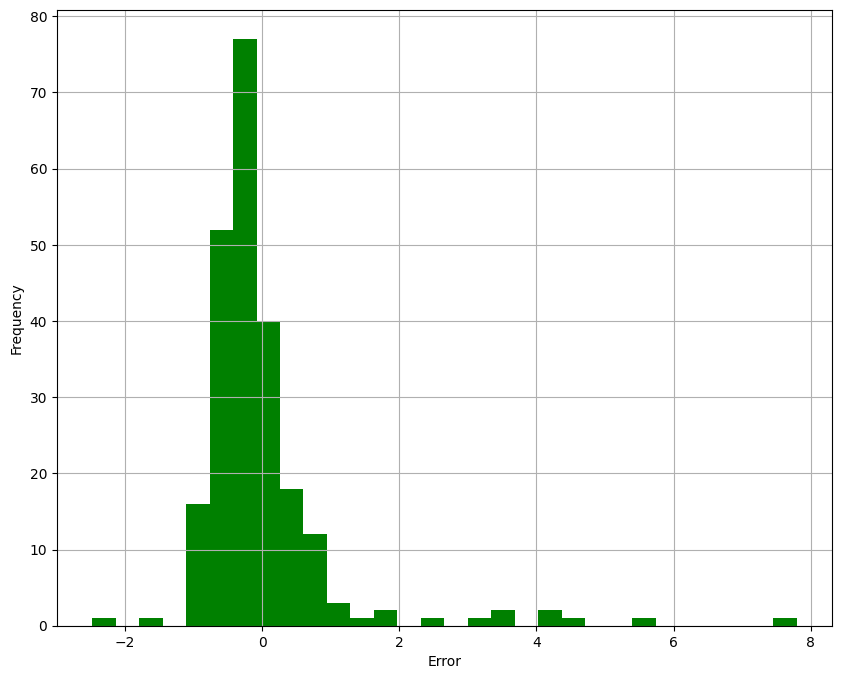

In [204]:
error_distribution_plot(weight,gallons_100)

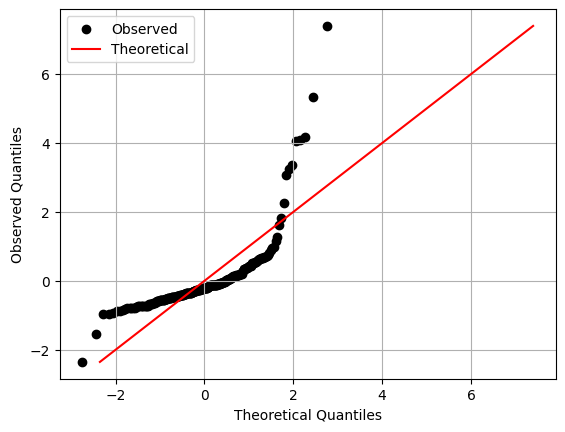

In [205]:
qq_plot(weight,gallons_100)